## Clasificación Múltiple con el Dataset MINST

### Cargar el Dataset de MINST

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2025-09-25 22:04:48.304829: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-25 22:04:48.320918: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-25 22:04:49.003239: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-25 22:04:52.141410: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

2.20.0


IMportemos el mdoulo de MINST desde keras

In [3]:
from tensorflow.keras.datasets import mnist

Carguemos los datos a nuestras tuplas clásicas de Train y test

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### Exploración de Datos

Obten el Shape de XTrain

In [4]:
x_train.shape

(60000, 28, 28)

Obten el Shape de yTrain

In [5]:
y_train.shape

(60000,)

Obten el Shape de XTest

In [6]:
x_test.shape

(10000, 28, 28)

Obten el Shape de yTrain

In [7]:
y_test.shape

(10000,)

Activa Matplotlib inline

In [5]:
%matplotlib inline

Importa matplotlib como plt

In [6]:
import matplotlib.pyplot as plt

Importa Seaborn

In [7]:
import seaborn as sns

Pon su escala a 2

In [8]:
sns.set(font_scale=2)

Importa Numpy

In [9]:
import numpy as np

Ahora armate un programa que muestre 24 digitos

In [ ]:
#obtener 24 datos al azar:choice(numpy)

In [10]:
indice=np.random.choice(np.arange(len(x_train)),24,replace=False)
indice

array([47971, 28506, 46089, 55291, 46655,  7779,  7504, 15277, 55691,
       15203, 15447, 55166, 47954,  5224, 13575, 47216, 11801, 40706,
       18687, 28666,  6595, 31189, 25197, 41124])

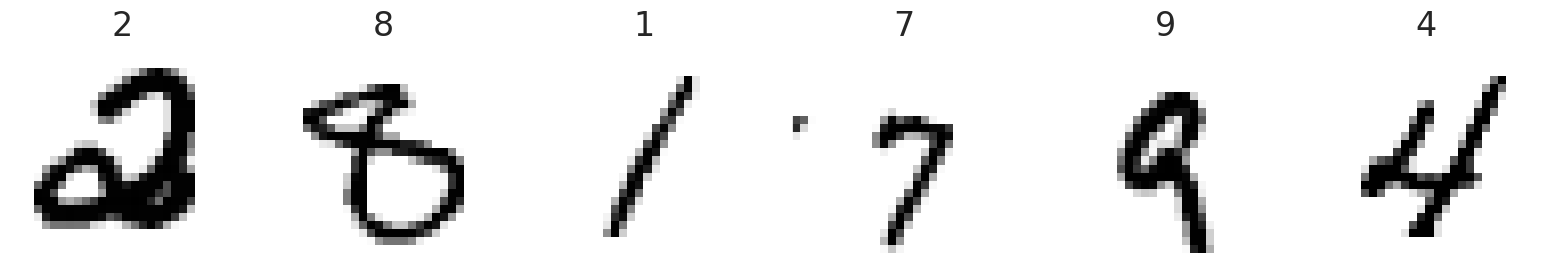

In [11]:
fig, axes = plt.subplots(ncols=6, figsize=(16, 9))
for item in zip(axes.ravel(),x_train[indice],y_train[indice]):
     axes,image,target=item
     axes.imshow(image,cmap=plt.cm.gray_r)
     axes.set_xticks([])
     axes.set_yticks([])
     axes.set_title(target)
plt.tight_layout()
plt.show()

### Preparar los datos

Cambia la figura de Xtrain a 60000 x 28 x 28 x 1

In [12]:
x_train=x_train.reshape((60000,28,28,1))

Checa su shape

In [13]:
x_train.shape

(60000, 28, 28, 1)

Cambia la figura de Xshape a 10000 x 28 x 28 x 1

In [14]:
x_test=x_test.reshape((10000,28,28,1))

Checa su Shape

In [15]:
x_test.shape

(10000, 28, 28, 1)

Normaliza con astype Xtrain

-reshape
-normalizar
-one hot encoding

Normaliza con astype Xtest

In [16]:
x_test=x_test.astype('float32')/255

In [17]:
x_train=x_train.astype('float32')/255

Desde tensorflow importa to_categorical

In [18]:
from tensorflow.keras.utils import to_categorical

aplicalo a Y_train

In [19]:
y_train=to_categorical(y_train)

Checa su shape

In [20]:
y_train.shape

(60000, 10)

Checa el primer dato de Y_train

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

Aplica to_categorical a Y-test

In [22]:
y_test=to_categorical(y_test)

Checa su figura

In [23]:
y_test.shape

(10000, 10)

### Crear la Red Neuronal

Importa Sequential desde tf

keras.sequentil() :agrupa capas en una red neuronal de keras/tensor flow

In [24]:
from tensorflow.keras.models import Sequential

Crea tu objeto cnn

In [25]:
cnn=Sequential()

importa las capas que necesitaras desde tf

In [26]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

agrega la capa de Conv2d

In [27]:
cnn.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))

/home/hassiel/anaconda3/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-25 22:06:26.668355: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


ReLu(Rectified Linear Unit):es una funcion de activacion lineal .Devuelver la misma entrada si esta es positiva y se usa para definir la salida de un nodo dadas las entradas

Ahora agrega una capa de Pooling2d

In [28]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Agrega otra caba de Conv2D

In [29]:
cnn.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))

Y otra de Pooling

In [30]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

Aplana los resultados

In [31]:
cnn.add(Flatten())

Agrega una capa DENSE

In [32]:
cnn.add(Dense(units=120,activation='relu'))

Y otra DENSE

In [33]:
cnn.add(Dense(units=10,activation='softmax'))

Imprime el resultado en un resumen

In [34]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       384,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,826 (1.75 MB)

 Trainable params: 459,826 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

Visualiza la estructura del modelo

In [35]:
!pip install pydot

In [34]:
# First, make sure you have a valid model defined
# If you don't have a model defined yet, here's a simple example:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Define a simple CNN model
cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])

# Make sure graphviz is installed for plot_model to work
# You might need to run: !pip install pydot graphviz

from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Save the model plot with explicit path
import os
current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'covnet2.png')

# Generate the plot
plot_model(cnn, to_file=file_path, show_shapes=True, show_layer_names=True)

# Verify the file exists before displaying
if os.path.exists(file_path):
    display(Image(filename=file_path))
else:
    print(f"Error: Could not create or find file at {file_path}")
    print("Make sure you have graphviz installed and proper write permissions.")
plot_model(cnn, to_file='covnet2.png', show_shapes=True, show_layer_names=True)
Image(filename='covnet2.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.
Error: Could not create or find file at /home/hassiel/Descargas/covnet2.png
Make sure you have graphviz installed and proper write permissions.
You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'covnet2.png'

In [36]:
# First, install the missing package
!pip install visualkeras

# Then import the required modules
import visualkeras
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Note: You may need to restart your kernel after installing new packages

/home/hassiel/anaconda3/lib/python3.13/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


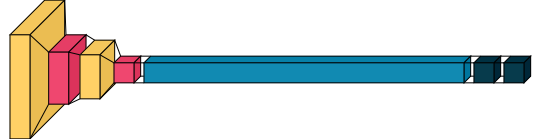

In [37]:
visualkeras.layered_view(cnn, to_file='covnet_visualkeras.png') 


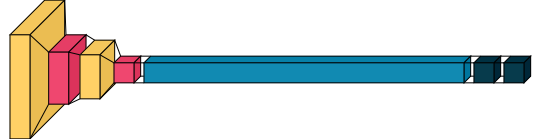

In [29]:
Image(filename='covnet_visualkeras.png')

Compila tu modelo

In [43]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Entrenar y Evaluar el modelo

Entrena tu modelo con fit

In [44]:
# Convert y_train to one-hot encoded format
from tensorflow.keras.utils import to_categorical

# Assuming y_train contains integer class labels from 0 to 9
# If your classes start from 1, you might need to adjust with y_train-1
num_classes = 10  # Adjust this based on your actual number of classes
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)

# Now fit the model with one-hot encoded targets
cnn.fit(x_train, y_train_one_hot, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.9470 - loss: 0.5330 - val_accuracy: 0.9832 - val_loss: 0.0574
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 50s 59ms/step - accuracy: 0.9836 - loss: 0.0543 - val_accuracy: 0.9865 - val_loss: 0.0465
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9828 - val_loss: 0.0628
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: 0.9897 - loss: 0.0315 - val_accuracy: 0.9862 - val_loss: 0.0511
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9887 - val_loss: 0.0463


cnn.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.1)

Evalua le modelo con Evaluate

In [48]:
# Convert y_test to one-hot encoded format
from tensorflow.keras.utils import to_categorical

# Assuming your classes are 0-9 (10 classes total)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Now evaluate with the correctly formatted data
loss, accuracy = cnn.evaluate(x_test, y_test_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9875 - loss: 0.0491


loss,accuracy=cnn.evaluate(x_test,y_test)

Vamos a hacer predicciones

In [49]:
predicciones=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


checa que dice el primer elemento de ytest

In [50]:
y_test[0]

np.uint8(7)

Y ahora que dice el primer elemento del modelo

In [84]:
for index,probability in enumerate(predicciones[0]):
    print(f'{index}:{probability:.10%}')

0:0.0000000023%
1:0.0000000000%
2:0.0000002626%
3:0.0000000001%
4:0.0000000002%
5:0.0000000000%
6:0.0000000000%
7:100.0000000000%
8:0.0000000027%
9:0.0000000001%


Ubiquemos las predicciones incorreectas

In [85]:
images=x_test.reshape((10000,28,28))
incorrect_predictions=[]

In [86]:
for i,(p,e) in enumerate(zip(predicciones,y_test)):
    predicted,expected=np.argmax(p),np.argmax(e)
    
    if predicted != expected:
        incorrect_predictions.append((i,images[i],predicted,expected))

Obten el largo de esa lista

In [87]:
len(incorrect_predictions)

9016

Visualiza las predicciones incorrectas

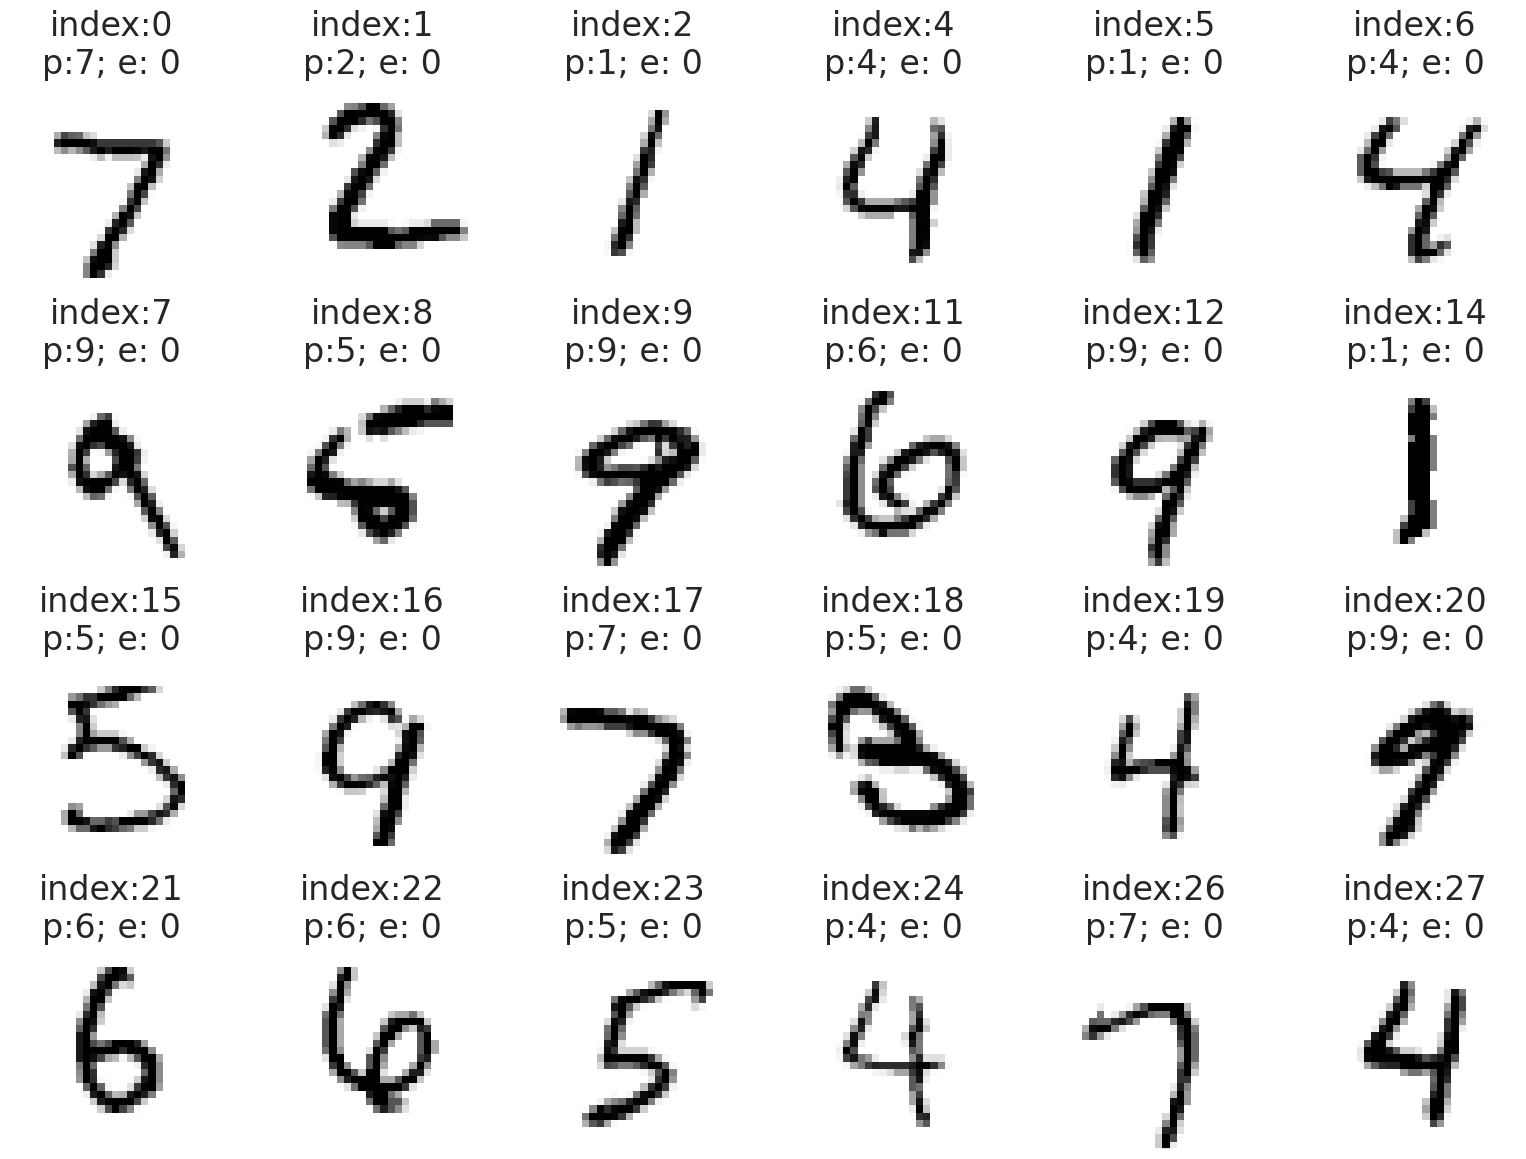

In [99]:
figure,axes=plt.subplots(nrows=4,ncols=6,figsize=(16,12))

for axes,item in zip(axes.ravel(),incorrect_predictions):
    index,image,predicted,expected=item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index:{index}\np:{predicted}; e: {expected}')
plt.tight_layout()
plt.show(1)

Arma una funcion que genere un listado de las probabilidades para predicciones incorrectas

In [100]:
def muestraprob (predicciones):
    for index,probability in enumerate(predicciones):
        print(f'{index}:{probability:.10%}')

Muestra una que otra predicción incorrecta a detalles

In [103]:
muestraprob(predicciones[582])

0:0.0000000233%
1:0.0181228534%
2:4.0264446288%
3:51.7490386963%
4:0.0000000642%
5:0.0000000073%
6:0.0000005832%
7:0.0003904801%
8:44.2060053349%
9:0.0000000029%


### Guardar tu Modelo

In [105]:
cnn.save('my_model.keras')

para abrir de nuevo el modelo

In [107]:
from tensorflow.keras.models import load_model
cnn=load_model('my_model.keras')

/home/hassiel/anaconda3/lib/python3.13/site-packages/keras/src/saving/saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## Analisis de Sentimientos con Redes Neuronales - IMDB

### Cargar el dataset de IMBD

Import el dataset de imdb desde tensorlfow.keras.datasets

In [3]:
from tensorflow.keras.datasets import imdb

Carga las 10000 palabras que mas ocurren

In [6]:
n_p=10000

Carga tus palabras en tus datasets X_train y X_test y asi

In [7]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=n_p)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### Exploracion de Datos

Figura de X_train

In [8]:
x_train.shape

(25000,)

Figura de Y_train

In [9]:
y_train.shape

(25000,)

Figura de X_test

In [10]:
x_test.shape

(25000,)

Figura de y_test

In [11]:
y_test.shape

(25000,)

Apaga pretty print

In [12]:
%pprint

Pretty printing has been turned OFF


Checa un elemento cualquiera de X_train

In [13]:
x_train[150]

[1, 5, 14, 9, 6, 55, 1193, 22, 13, 203, 30, 355, 21, 14, 9, 4, 236, 22, 121, 13, 1192, 2967, 3622, 35, 779, 284, 37, 5844, 4, 217, 5, 2132, 6, 749, 10, 10, 2636, 4252, 5, 2931, 4517, 26, 82, 321, 36, 26, 2, 5, 4960, 2, 1786, 8, 358, 4, 704, 117, 122, 36, 124, 51, 62, 593, 375, 10, 10, 4, 1381, 5, 732, 26, 821, 5, 1249, 14, 16, 159, 4, 504, 7, 3728, 4913, 10, 10, 51, 9, 91, 1193, 44, 14, 22, 9, 4, 192, 15, 1370, 40, 14, 131, 1778, 11, 938, 704, 3834, 131, 2, 543, 84, 12, 9, 220, 6, 1117, 5, 6, 320, 237, 4, 3286, 325, 10, 10, 25, 80, 358, 14, 22, 12, 16, 814, 11, 4, 3968, 8084, 7, 1226, 7111, 63, 131, 1778, 43, 92, 1278, 501, 15, 8, 6353, 2, 15, 1609, 131, 47, 24, 77, 2, 237, 2, 2, 158, 158]

Llama la función word to index

In [14]:
word_to_index=imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Checa el indice de la palabra "bad"

In [16]:
word_to_index['bad']

75

Reversa el mapeo del diccionario Word to INdex a Index to Word

In [23]:
index_to_word={index:word for (word,index) in word_to_index.items()}

Armate una lista para revisar las 50 palabras mas comunes en el diccionario

In [24]:
index_to_word[75]

'bad'

Ok, ya estamos listos para leer una reseña

In [28]:
[index_to_word[i] for i in range (1,51)]

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'are', 'his', 'have', 'he', 'be', 'one', 'all', 'at', 'by', 'an', 'they', 'who', 'so', 'from', 'like', 'her', 'or', 'just', 'about', "it's", 'out', 'has', 'if', 'some', 'there', 'what', 'good', 'more']

Y revisa de Y_train la clasificacion de esta reseña

In [32]:
' '.join([index_to_word.get(i-3,'?') for i in x_train[123]])

'? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too'

In [33]:
y_train[123]

np.int64(1)

### Preparación de datos

Define palabras_por_reseña en 200

In [80]:
numpal=200

Importa pad_sequences de tensroflow

In [81]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

Define X_train como pad_sequences del viejo X_train

In [82]:
x_train=pad_sequences(x_train,maxlen=numpal)

Checa el nuevo shape de X_train

In [83]:
x_train.shape

(25000, 200)

Hay que reconfigurar X_Test tambien

In [84]:
x_test=pad_sequences(x_test,maxlen=numpal)

Checa su figura

In [85]:
x_test.shape

(20000, 200)

Importa el Train_test_split y definelo sobre tus variables, semilla 11 y tamaño de prueba de .20

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,random_state=11,test_size=0.20)

Checa la figura de xtest

In [88]:
x_test.shape

(16000, 200)

Y la de XVal

In [89]:
x_val.shape

(4000, 200)

In [90]:
y_val.shape

(4000,)

CREAR RED NEURONAL

In [91]:
from tensorflow.keras.models import Sequential

In [92]:
rnn=Sequential()

In [93]:
from  tensorflow.keras.layers import Dense,LSTM

In [94]:
import tensorflow as tf

ONE HOT ENCODING

RPRESENTACION DE VECTOR DENSO : las alabras estan representadas por vectores densos done un vector  represena la proyeccion de la palabra e un espacio vectorial continuo.

In [95]:
rnn.add(tf.keras.layers.Embedding(input_dim=n_p,output_dim=128,input_length=numpal))

In [96]:
rnn.add(LSTM(units=128,dropout=0.2,recurrent_dropout=0.2))

mientras mas neuronas, mas puede recordad el modelo, este modelo tiene 128 neuronas

In [97]:
rnn.add(Dense(units=1,activation='sigmoid'))

In [98]:
rnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [99]:
rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Desde Tensorflow importa Sequencial

arma el objeto rnn com oun sequential

Importa las capas Dense y LSTM

Importa Embedding

Agrega la capa de Embedding, que salgan 128 dimensiones

agrega la capa de LSTM

Agrega una capa DENSE

Compila el RNN

Y resvisa el resultado de RNN

### Entrenar y evaluar el modelo

Usa Fit para entrenar el mdoelo

In [101]:
rnn.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 150s 188ms/step - accuracy: 0.7807 - loss: 0.4683 - val_accuracy: 0.8382 - val_loss: 0.3783
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 174ms/step - accuracy: 0.8525 - loss: 0.3531 - val_accuracy: 0.8232 - val_loss: 0.3963
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 136s 174ms/step - accuracy: 0.8945 - loss: 0.2665 - val_accuracy: 0.8521 - val_loss: 0.3605
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 175ms/step - accuracy: 0.9067 - loss: 0.2310 - val_accuracy: 0.8522 - val_loss: 0.3868
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 175ms/step - accuracy: 0.9150 - loss: 0.2170 - val_accuracy: 0.8534 - val_loss: 0.4350
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 137s 176ms/step - accuracy: 0.9440 - loss: 0.1513 - val_accuracy: 0.8476 - val_loss: 0.4029
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 167s 213ms/step - accuracy: 0.9603 - loss: 0.1109 - val_accuracy: 0.8457 - val_loss: 0.4758
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 181ms/step - accuracy: 0.9722 -

Checa tus resultados

In [102]:
resultados=rnn.evaluate(x_test,y_test)

500/500 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8329 - loss: 0.5804


Y revisa el resultado

In [104]:
resultados

[0.580357015132904, 0.832937479019165]